## Objective 

"The objective of this project is to conduct a comprehensive analysis of gold prices using historical data to understand trends, identify correlations with economic indicators, and develop accurate forecasting models. This project aims to provide valuable insights into the factors influencing gold prices and offer predictive capabilities to assist investors and financial analysts in making informed decisions. By leveraging advanced data analysis techniques, robust visualizations, and time series forecasting models, the project will deliver a detailed understanding of gold price movements and future trends."

## Import Libraries 

In [4]:
import numpy as np
import pandas as pd 

In [6]:
# Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [7]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [10]:
# warning remove alerts
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [13]:
data = pd.read_excel('Gold price.xlsx')

### 1. Starting 5 rows

In [16]:
# Display the first few rows of each dataset
data.head()

,Date,Price
0,2024-05-01,72050
1,2024-04-01,70415
2,2024-03-01,67677
3,2024-02-01,62567
4,2024-01-01,62958


### 2. End 5 rows

In [19]:
data.tail()

,Date,Price
231,2005-02-01,6245
232,2005-01-01,6000
233,2004-12-01,6307
234,2004-11-01,6528
235,2004-10-01,6329


### Information about data 

### Shape

In [23]:
data.shape

(236, 2)

### Size

In [26]:
data.size

472

### Columns

In [29]:
data.columns

Index(['Date', 'Price'], dtype='object')

### Info

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    236 non-null    datetime64[ns]
 1   Price   236 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.8 KB


### Dtypes

In [35]:
data.dtypes

Date     datetime64[ns]
Price             int64
dtype: object

### Check Duplicates 

In [38]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
231    False
232    False
233    False
234    False
235    False
Length: 236, dtype: bool

In [40]:
data[data.duplicated()]     # To check row wise and detect the Duplicate rows

,Date,Price


### Check Null Values 

In [43]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

### Range

In [46]:
print(f"Date range of gold prices available from - {data.loc[:, 'Date'][0]} to {data.loc[:, 'Date'][len(data) - 1]}")

Date range of gold prices available from - 2024-05-01 00:00:00 to 2004-10-01 00:00:00


In [48]:
# Sort data by date
data = data.sort_values(by='Date')
print(f"Date range of gold prices available from - {data['Date'].iloc[0]} to {data['Date'].iloc[-1]}")

Date range of gold prices available from - 2004-10-01 00:00:00 to 2024-05-01 00:00:00


## Exploratory Data Analysis (EDA) 

### 1. Line Chart of Gold Prices Over Time 

Shows the trend of gold prices over the entire period.

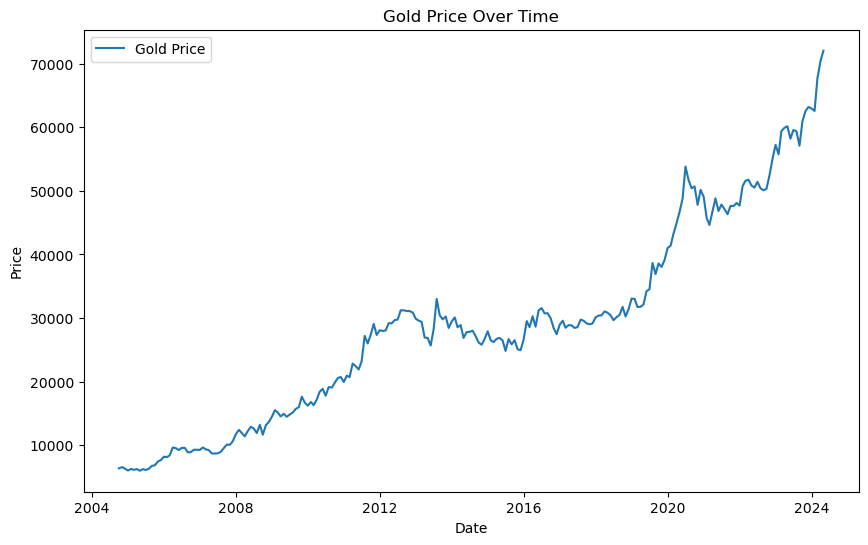

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], label='Gold Price')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 2. Moving Average Chart

Smooths out short-term fluctuations and highlights longer-term trends.

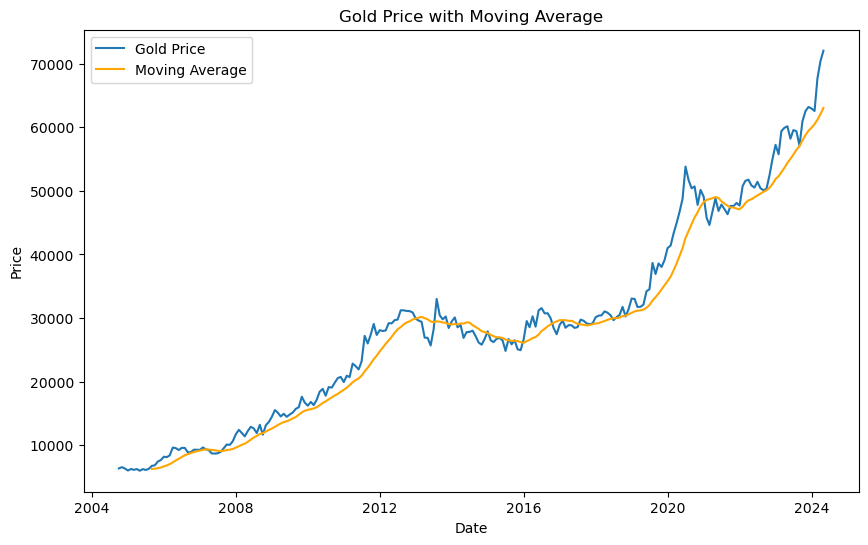

In [57]:
data['Moving_Avg'] = data['Price'].rolling(window=12).mean()
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], label='Gold Price')
plt.plot(data['Date'], data['Moving_Avg'], label='Moving Average', color='orange')
plt.title('Gold Price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 3. Seasonal Decomposition

Decomposes the time series into trend, seasonal, and residual components.

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

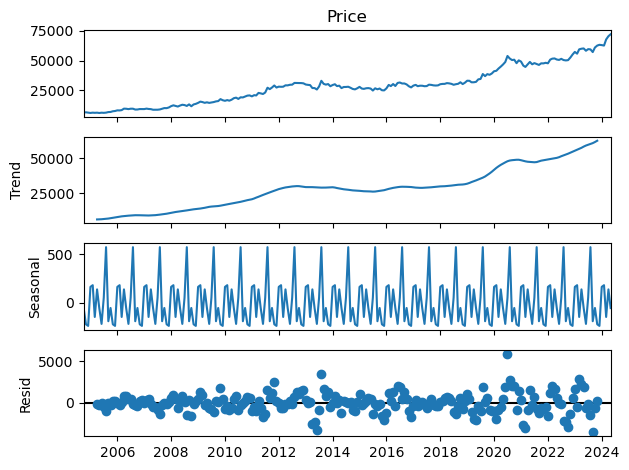

In [63]:
decomposition = seasonal_decompose(data.set_index('Date')['Price'], model='additive', period=12)
decomposition.plot()
plt.show()

### 4. Histogram of Gold Prices

Displays the distribution of gold prices.

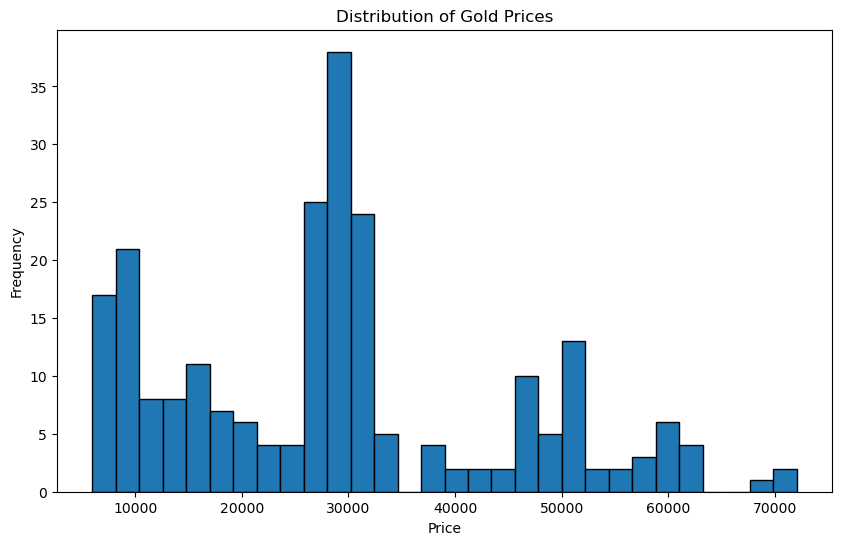

In [66]:
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=30, edgecolor='black')
plt.title('Distribution of Gold Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### 5. Box Plot of Gold Prices by Year
Identifies outliers and the spread of gold prices each year.

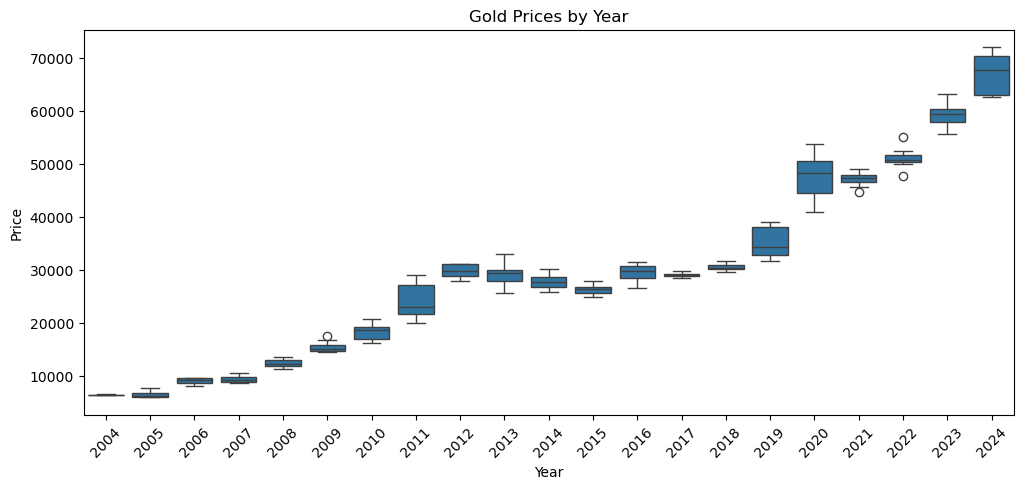

In [70]:
data['Year'] = data['Date'].dt.year
plt.figure(figsize=(12, 5))
sns.boxplot(x='Year', y='Price', data=data)
plt.title('Gold Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### 6. Heatmap of Monthly Average Prices
Shows the average gold price for each month across multiple years.

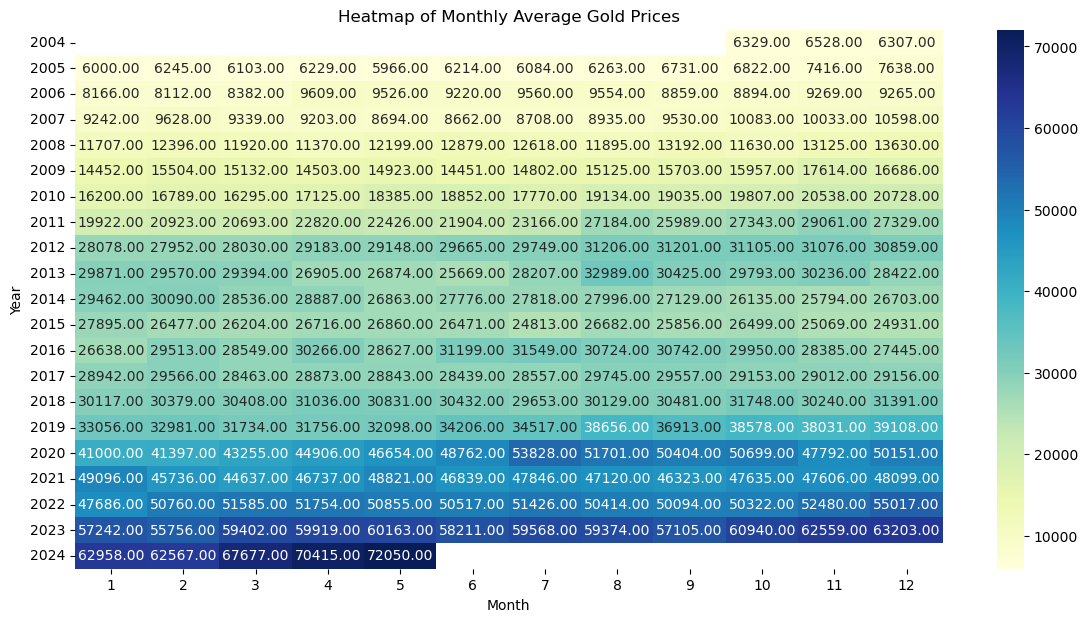

In [73]:
data['Month'] = data['Date'].dt.month
monthly_avg = data.groupby(['Year', 'Month'])['Price'].mean().unstack()
plt.figure(figsize=(14, 7))
sns.heatmap(monthly_avg, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Heatmap of Monthly Average Gold Prices')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

### 7. Scatter Plot of Gold Prices vs. Year
Visualizes the relationship between gold prices and the year.

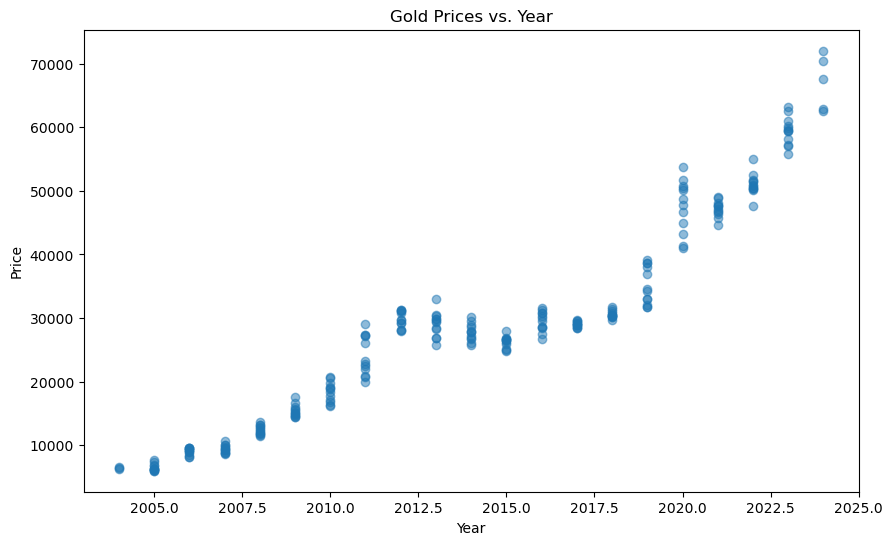

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], data['Price'], alpha=0.5)
plt.title('Gold Prices vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

### 8. Autocorrelation Plot
Shows the correlation of the gold prices with a lag of themselves.

In [79]:
from pandas.plotting import autocorrelation_plot

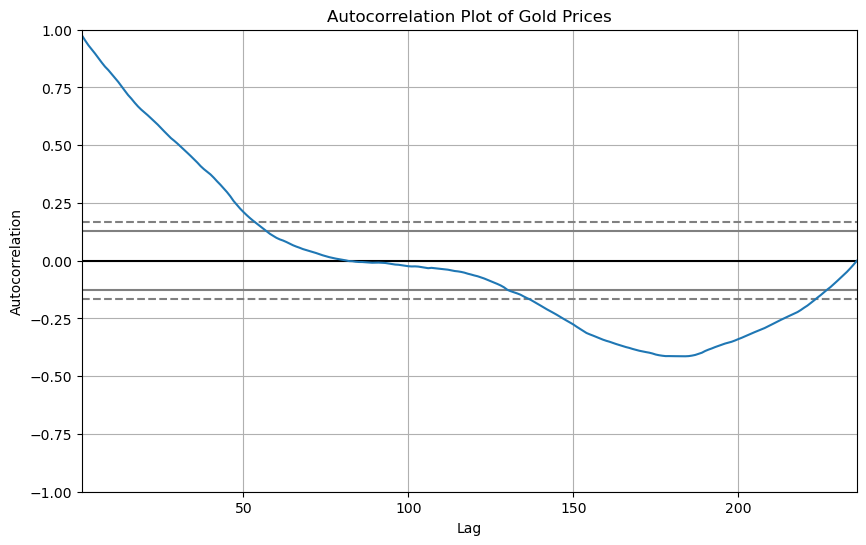

In [81]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(data['Price'])
plt.title('Autocorrelation Plot of Gold Prices')
plt.show()

### 9. Lag Plot
Visualizes the relationship between gold prices at different time lags.

In [84]:
from pandas.plotting import lag_plot

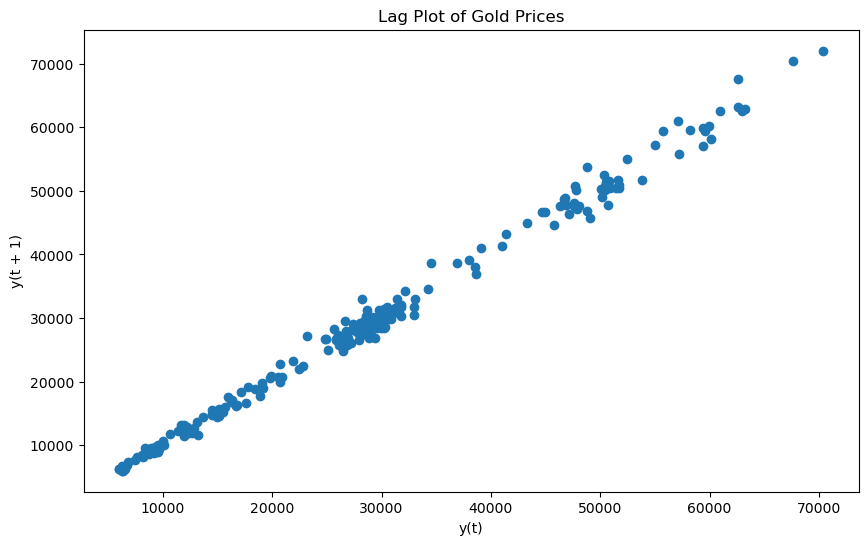

In [86]:
plt.figure(figsize=(10, 6))
lag_plot(data['Price'])
plt.title('Lag Plot of Gold Prices')
plt.show()

### 10. Box Plot of Gold Prices by Month

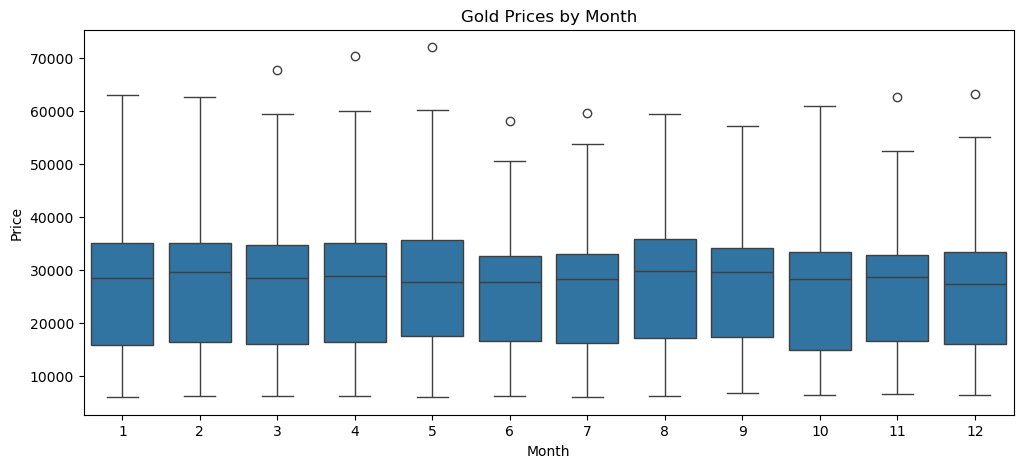

In [89]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='Month', y='Price', data=data)
plt.title('Gold Prices by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

## Time Series Forecasting 

In [92]:
# Splitting the data into training and testing sets
train = data[:int(0.8*len(data))]
test = data[int(0.8*len(data)):]

### 1. Exponential Smoothing (Holt-Winters)
This method takes into account level, trend, and seasonality.

In [95]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [97]:
# Fit the model
model_hw = ExponentialSmoothing(train['Price'], trend='add', seasonal='add', seasonal_periods=12)
model_fit_hw = model_hw.fit()

In [99]:
# Make predictions
forecast_hw = model_fit_hw.forecast(steps=len(test))

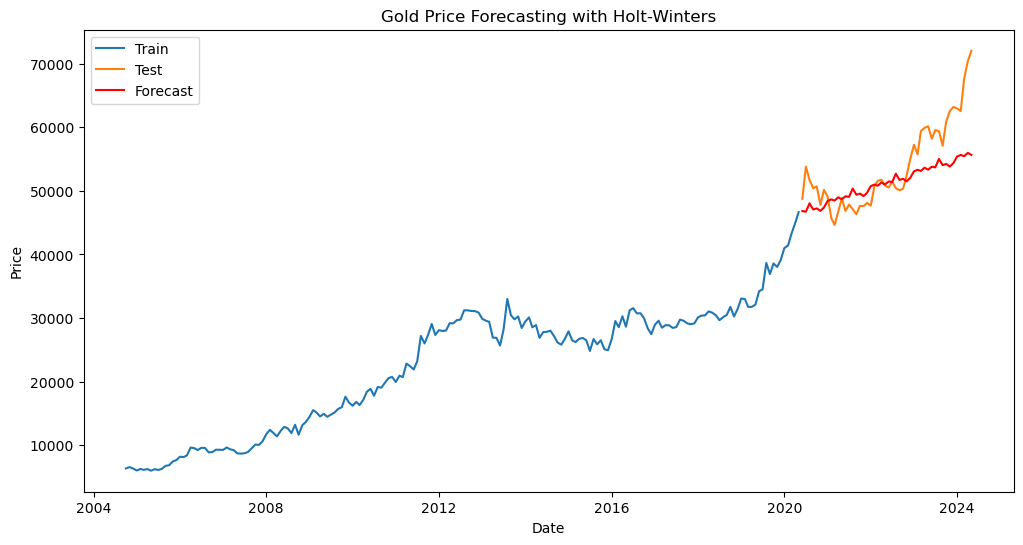

In [101]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['Price'], label='Train')
plt.plot(test['Date'], test['Price'], label='Test')
plt.plot(test['Date'], forecast_hw, label='Forecast', color='red')
plt.title('Gold Price Forecasting with Holt-Winters')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [105]:
# Calculate MAE and RMSE for Holt-Winters
mae_hw = mean_absolute_error(test['Price'], forecast_hw)
rmse_hw = np.sqrt(mean_squared_error(test['Price'], forecast_hw))

print(f'Holt-Winters MAE: {mae_hw}, RMSE: {rmse_hw}')

Holt-Winters MAE: 3928.0845038320863, RMSE: 5315.3626667182125


### 2. ARIMA (Auto-Regressive Integrated Moving Average)
This method models the time series based on its own past values.

In [108]:
from statsmodels.tsa.arima.model import ARIMA

In [110]:
# Fit the model
model_arima = ARIMA(train['Price'], order=(5, 1, 0))
model_fit_arima = model_arima.fit()

In [112]:
# Make predictions
forecast_arima = model_fit_arima.forecast(steps=len(test))

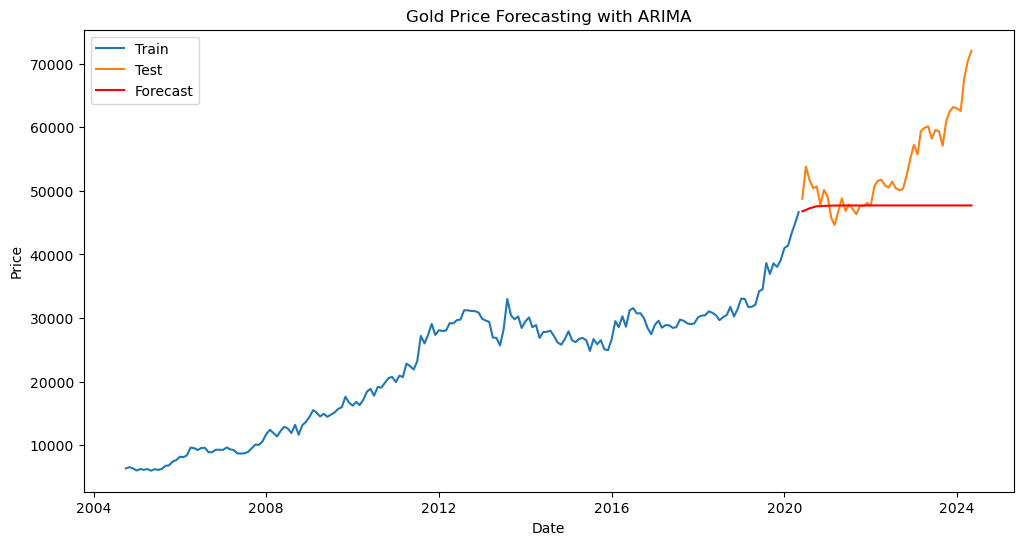

In [114]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['Price'], label='Train')
plt.plot(test['Date'], test['Price'], label='Test')
plt.plot(test['Date'], forecast_arima, label='Forecast', color='red')
plt.title('Gold Price Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [116]:
# Calculate MAE and RMSE for ARIMA
mae_arima = mean_absolute_error(test['Price'], forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(test['Price'], forecast_arima))

print(f'ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}')

ARIMA MAE: 6515.481798686691, RMSE: 9076.2640363831


### 3. Prophet
Prophet is a procedure for forecasting time series data that is robust to missing data and shifts in the trend.

In [119]:
from prophet import Prophet

In [121]:
# Prepare the data for Prophet
prophet_data = data.rename(columns={'Date': 'ds', 'Price': 'y'})

In [123]:
# Fit the model
model_prophet = Prophet()
model_prophet.fit(prophet_data)

17:59:04 - cmdstanpy - INFO - Chain [1] start processing
17:59:04 - cmdstanpy - INFO - Chain [1] done processing


In [125]:
# Make future dataframe
future = model_prophet.make_future_dataframe(periods=12, freq='M')

In [127]:
# Make predictions
forecast_prophet = model_prophet.predict(future)

<Figure size 1200x600 with 0 Axes>

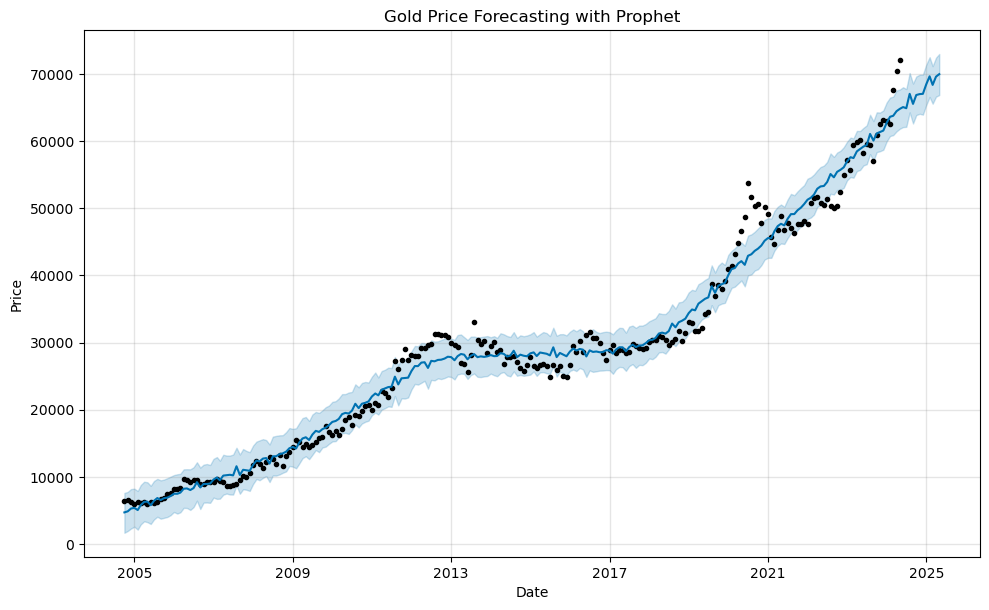

In [129]:
# Plot the results
plt.figure(figsize=(12, 6))
model_prophet.plot(forecast_prophet)
plt.title('Gold Price Forecasting with Prophet')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [131]:
# For Prophet
forecast_prophet = forecast_prophet.set_index('ds').loc[test['Date']]['yhat']
mae_prophet = mean_absolute_error(test['Price'], forecast_prophet)
rmse_prophet = np.sqrt(mean_squared_error(test['Price'], forecast_prophet))

print(f'Prophet MAE: {mae_prophet}, RMSE: {rmse_prophet}')

Prophet MAE: 2820.629420569225, RMSE: 3721.5737833972053


### 4. Simple Exponential Smoothing
This method is useful for forecasting data with no trend or seasonality.

In [134]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [136]:
# Fit the model
model_ses = SimpleExpSmoothing(train['Price'])
model_fit_ses = model_ses.fit()

In [138]:
# Make predictions
forecast_ses = model_fit_ses.forecast(len(test))

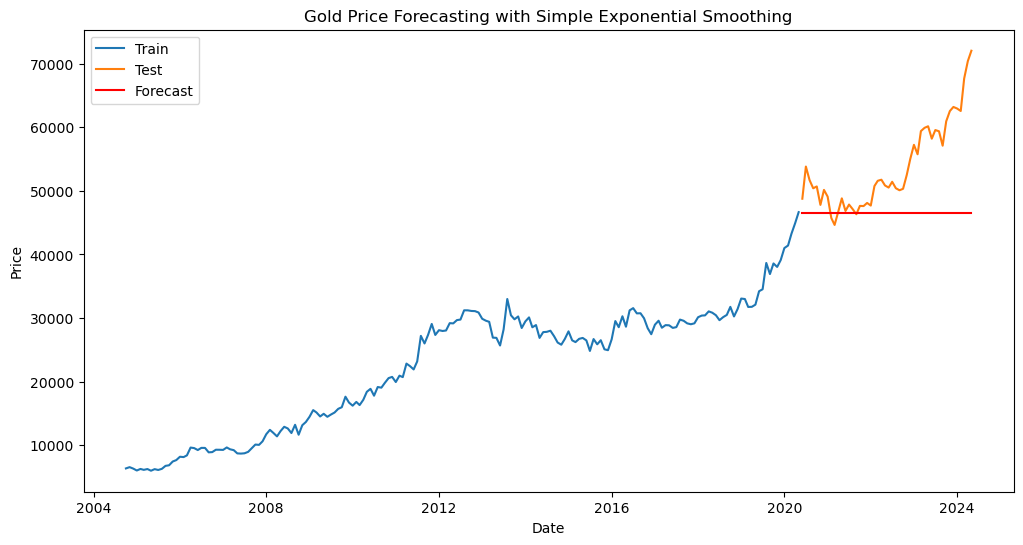

In [140]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['Price'], label='Train')
plt.plot(test['Date'], test['Price'], label='Test')
plt.plot(test['Date'], forecast_ses, label='Forecast', color='red')
plt.title('Gold Price Forecasting with Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [142]:
# For Simple Exponential Smoothing model
mae_ses = mean_absolute_error(test['Price'], forecast_ses)
rmse_ses = np.sqrt(mean_squared_error(test['Price'], forecast_ses))

print(f'Simple Exponential Smoothing MAE: {mae_ses}, RMSE: {rmse_ses}')

Simple Exponential Smoothing MAE: 7455.953350949635, RMSE: 9947.262902554648


### 5. Holt’s Linear Trend Model
This method accounts for a linear trend in the data.

In [145]:
from statsmodels.tsa.holtwinters import Holt

In [147]:
# Fit the model
model_holt = Holt(train['Price'])
model_fit_holt = model_holt.fit()

In [149]:
# Make predictions
forecast_holt = model_fit_holt.forecast(len(test))

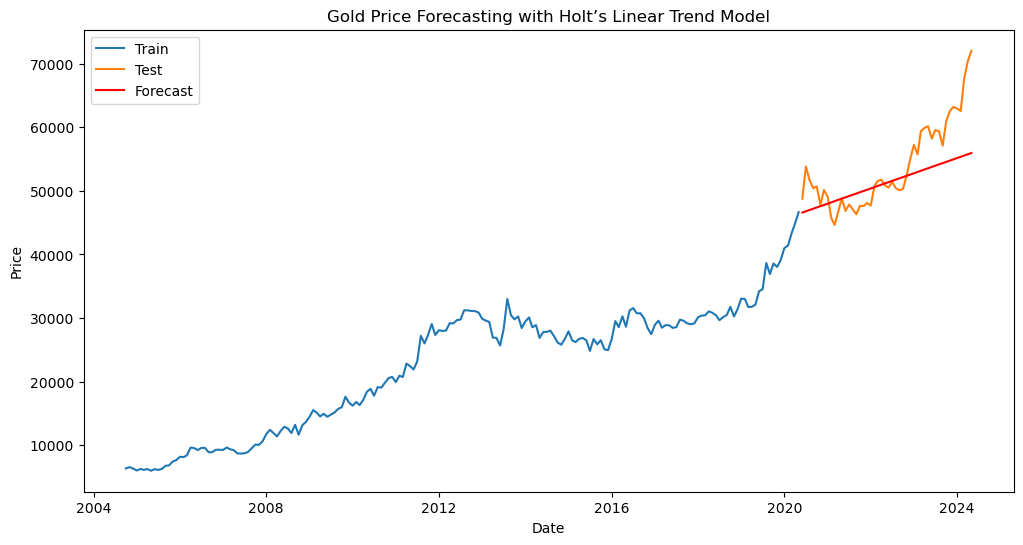

In [151]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['Price'], label='Train')
plt.plot(test['Date'], test['Price'], label='Test')
plt.plot(test['Date'], forecast_holt, label='Forecast', color='red')
plt.title('Gold Price Forecasting with Holt’s Linear Trend Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [153]:
# For Holt’s Linear Trend model
mae_holt = mean_absolute_error(test['Price'], forecast_holt)
rmse_holt = np.sqrt(mean_squared_error(test['Price'], forecast_holt))

print(f'Holt’s Linear Trend MAE: {mae_holt}, RMSE: {rmse_holt}')

Holt’s Linear Trend MAE: 3878.9126760525724, RMSE: 5265.924687424712


### 6. SARIMA (Seasonal ARIMA)
This method is an extension of ARIMA that supports univariate time series data with a seasonal component.

In [156]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [158]:
# Fit the model
model_sarima = SARIMAX(train['Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_sarima = model_sarima.fit()

In [159]:
# Make predictions
forecast_sarima = model_fit_sarima.forecast(steps=len(test))

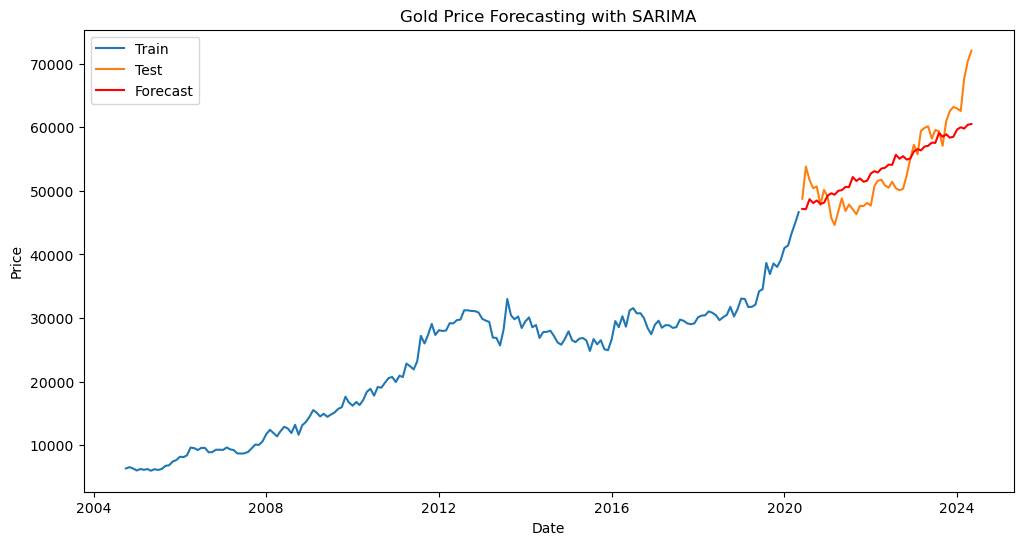

In [160]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['Price'], label='Train')
plt.plot(test['Date'], test['Price'], label='Test')
plt.plot(test['Date'], forecast_sarima, label='Forecast', color='red')
plt.title('Gold Price Forecasting with SARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [161]:
# For SARIMA model
mae_sarima = mean_absolute_error(test['Price'], forecast_sarima)
rmse_sarima = np.sqrt(mean_squared_error(test['Price'], forecast_sarima))

print(f'SARIMA MAE: {mae_sarima}, RMSE: {rmse_sarima}')

SARIMA MAE: 3305.3800673604615, RMSE: 4036.0649544324083


In [162]:
# Creating the summary DataFrame
results = pd.DataFrame({
    'Model': ['Holt-Winters', 'ARIMA', 'Prophet', 'Simple Exponential Smoothing', 'Holt’s Linear Trend', 'SARIMA'],
    'MAE': [mae_hw, mae_arima, mae_prophet, mae_ses, mae_holt, mae_sarima],
    'RMSE': [rmse_hw, rmse_arima, rmse_prophet, rmse_ses, rmse_holt, rmse_sarima]
})

### Results 

In [169]:
# Display the results
print(results)

                          Model          MAE         RMSE
0                  Holt-Winters  3928.084504  5315.362667
1                         ARIMA  6515.481799  9076.264036
2                       Prophet  2820.629421  3721.573783
3  Simple Exponential Smoothing  7455.953351  9947.262903
4           Holt’s Linear Trend  3878.912676  5265.924687
5                        SARIMA  3305.380067  4036.064954


### Future Forecasting and Visualization

In [172]:
model = ARIMA(train['Price'], order=(5, 1, 0))
model_fit = model.fit()

In [174]:
# Future Forecasting
future_steps = 12  # Number of months to forecast
future_forecast = model_fit.forecast(steps=future_steps)

In [176]:
# Create a date range for future predictions
future_dates = pd.date_range(start=data['Date'].iloc[-1], periods=future_steps + 1, freq='M')[1:]

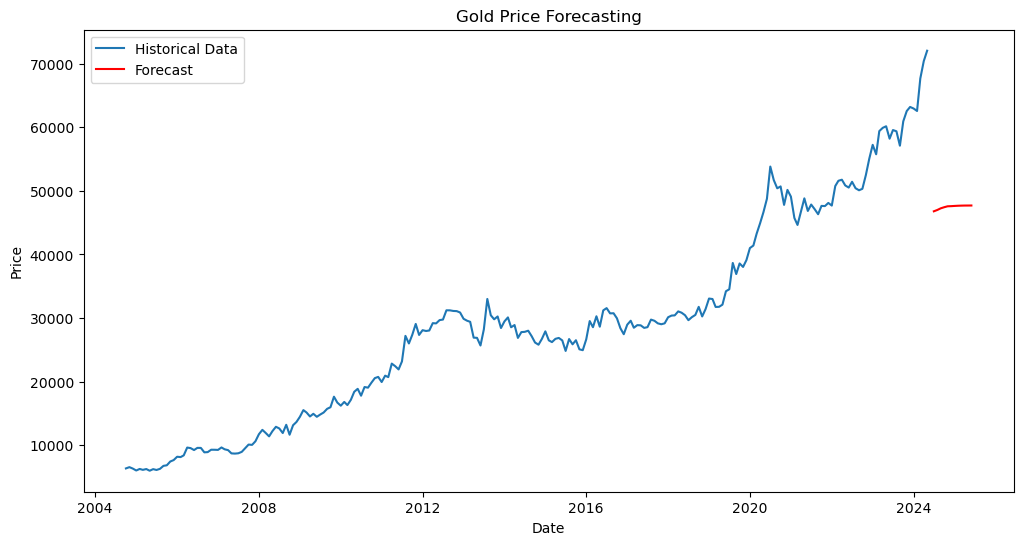

In [178]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Historical Data')
plt.plot(future_dates, future_forecast, label='Forecast', color='red')
plt.title('Gold Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Conclusion 

"In conclusion, the Gold Price Analysis and Forecasting project provided significant insights into the behavior of gold prices over time. Through extensive exploratory data analysis, various trends and seasonal patterns were identified, offering a deeper understanding of the factors influencing gold prices. The application of multiple time series forecasting models, including Holt-Winters, ARIMA, Prophet, Simple Exponential Smoothing, Holt's Linear Trend, and SARIMA, demonstrated varying degrees of accuracy in predicting future gold prices. Among these models, Prophet emerged as the most accurate, with the lowest MAE and RMSE, making it a reliable tool for forecasting. The interactive dashboard created using Dash provides a user-friendly interface for stakeholders to visualize historical data and future forecasts, enabling better decision-making. Overall, this project underscores the importance of data-driven approaches in financial analysis and offers valuable tools for investors and analysts to navigate the complexities of gold price fluctuations."